In [116]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [117]:
import cPickle as pickle
import gzip
import seaborn as sns

In [118]:
def local_maxima(d):
    '''
    returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
    this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
    '''
    return r_[True, d[1:] >= d[:-1]] & r_[d[:-1] > d[1:], True]

def get_spike_idx(V, th=0):
    return np.nonzero(local_maxima(V) & (V>th))[0]


### PNs

In [119]:
PNData = pickle.load(gzip.open('Data/PNdata.pklz'))

dt = 1/20000. #20kHz sampling rate

In [120]:
spike_times = [[get_spike_idx(V)*dt for V in sweeps] for sweeps in PNData]

In [121]:
ISIs = [[diff(st) for st in sweeps] for sweeps in spike_times]

In [122]:
def plot_isis(neuron_number):
    for times,isis in zip(spike_times[neuron_number],ISIs[neuron_number]):
        plot(times[:-1],isis, '.--')
        plt.xlabel('Time (s)')
        plt.ylabel('Interspike Intervals (s)')


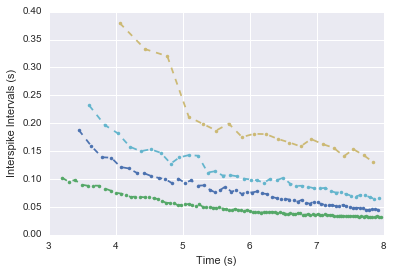

In [123]:
plot_isis(0)
savefig('PNsISI.png',transparent=True,fmt='png')

### LNs

In [124]:
LNData = pickle.load(gzip.open('Data/LNdata.pklz'))
dt = 1/20000. #20kHz sampling rate

In [125]:
spike_times = [[get_spike_idx(V)*dt for V in sweeps] for sweeps in LNData]
ISIs = [[diff(st) for st in sweeps] for sweeps in spike_times]

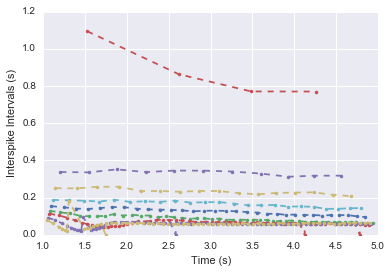

In [126]:
plot_isis(0)
savefig('LNsISI.png',transparent=True,fmt='png')